#  Predicting Homeownership

In [ ]:
# Import modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df_data = pd.read_csv('PSID_Python.csv')

In [ ]:
df_data.info()

In [ ]:
X = df_data[ ['owncar', 'ownbusiness', 'healthins', 'collegeeduc', 'highlifesatis', 'retired', 'logage', 'hhsize'] ]
y = df_data['ownhome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)


In [ ]:
X_train.info()

In [ ]:
X_test.info()

# DATA VISUALIZATIONS

Distribution of Household Size and House Ownership

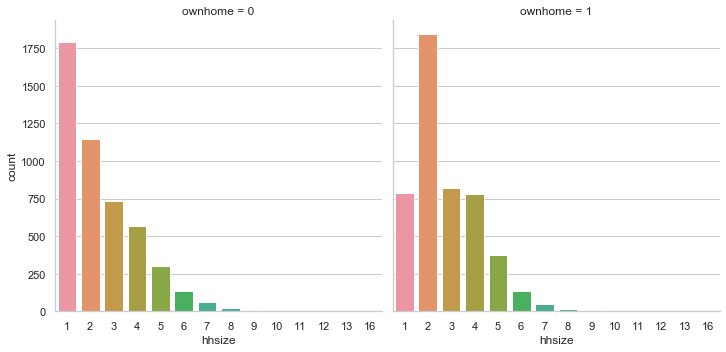

In [8]:
sns.catplot(x='hhsize', col ='ownhome', kind='count', data = df_data)

Distrubution of Logage and Homeownership

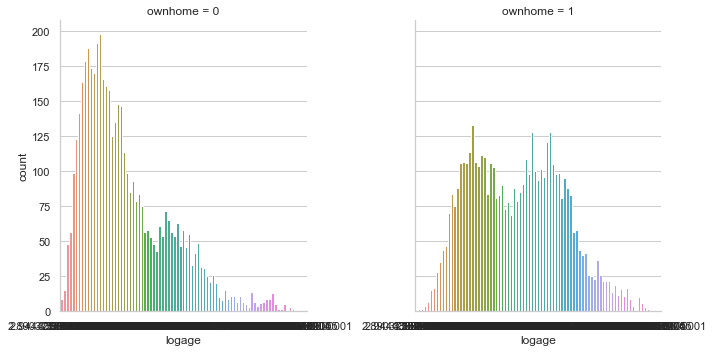

In [9]:
sns.catplot(x='logage', col ='ownhome', kind='count', data = df_data)

Relationship between Carownership and Homeownership

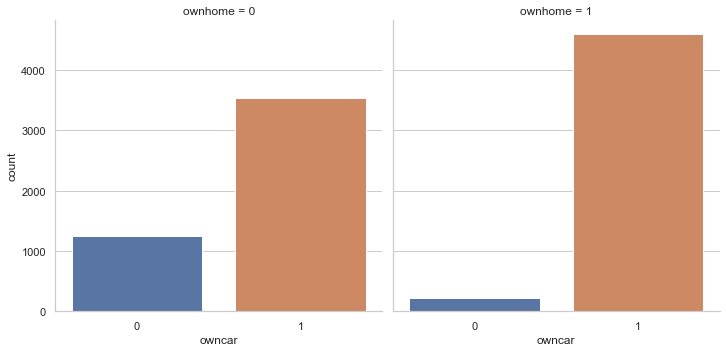

In [ ]:
sns.catplot(x='owncar', col ='ownhome', kind='count', data = df_data)

Relationship between High Life Satisfaction and Homeownership

In [ ]:
sns.catplot(x='highlifesatis', col ='ownhome', kind='count', data = df_data)

Relationship between Businessownership and Homeownership

In [ ]:
sns.catplot(x='ownbusiness', col ='ownhome', kind='count', data = df_data)


Relationship between Carownership and Homeownership

In [ ]:
sns.catplot(x='owncar', col ='ownhome', kind='count', data = df_data)

Relationship between Health Insurance and Homeownership

In [ ]:
sns.catplot(x='healthins', col ='ownhome', kind='count', data = df_data)

Relationship between College Education and Homeownership

In [ ]:
sns.catplot(x='collegeeduc', col ='ownhome', kind='count', data = df_data)

Relationship between Retirement and Homeownership

In [ ]:
sns.catplot(x='retired', col ='ownhome', kind='count', data = df_data)

# LOGISTIC REGRESSION

In [ ]:
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
logtrainy_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(logreg.score(X_train, y_train)))

In [ ]:
logtesty_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix.train = confusion_matrix(y_train, logtrainy_pred)
print(confusion_matrix.train)

from sklearn.metrics import confusion_matrix
confusion_matrix.test = confusion_matrix(y_test, logtesty_pred)
print(confusion_matrix.test)

Training Confusion Matrix

In [ ]:
#Confusion Matrix for Training
group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.train.flatten()/np.sum(confusion_matrix.train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix.train, annot=labels, fmt='', cmap='Blues')

Test Confusion Matrix

In [ ]:
#Confusion Matrix for Test
group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.test.flatten()/np.sum(confusion_matrix.test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix.test, annot=labels, fmt='', cmap='Blues')

ROC CURVE

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1500, bootstrap=True, oob_score=True)
rf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X)
accuracy = accuracy_score(y, predicted)
print(f'Mean accuracy score: {accuracy:.3}')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y, predicted)

Random Forest Confusion Matrix

In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix1.flatten()/np.sum(confusion_matrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix1, annot=labels, fmt='', cmap='Blues')